# **Project Name**    - Mobile Price Range Prdiction


##### **Project Type**    - Classifiaction
##### **Contribution**    - TEAM 
##### **Team Name** - TEAM DENVER
##### **Team Member 1 -**  Sumit Ghanghas   
##### **Team Member 2 -**  Bhoomika Dhayal


# **GitHub Link -**

##### **Team Member 1 -**  Sumit Ghanghas 
https://github.com/ghanghas291/mobile-price-prediction
##### **Team Member 2 -**  Bhoomika Dhayal
https://github.com/Bhoomikadayal/casptone-project---2-Regression.git


# **Project Summary -**

#### Mobile phones have become a necessity for every individual person. People want more features and best specifications in a phone  at cheaper prices.
#### Mobile phones come in all sorts of prices, features, specifications and all. Price estimation and prediction is an important part of consumer strategy by a company. Deciding the correct price of a product is very important for the market success of that product. A new product that has to be launched must have the correct price so that consumers wants to buy the product.
#### In the competitive  market, companies want to understand sales data of mobile phones and factors which drive the prices. The objective is to find out some relation between features of a mobile phone (e.g.:- RAM, Internal Memory, etc) and its selling price. In this problem, we do not have to predict the actual price but a price range indicating how high the price is.
#### The main objective of this project is to build a model which will classify the price range of mobile phones based on the specifications of mobile phones.


# **Business Understanding**

**In the competitive mobile phone market companies want to understand sales data of mobile phones and factors which drive the prices.The objective is to find out some relation between features of a mobile phone(eg:- RAM,Internal Memory, etc) and its selling price. In this problem, we do not have to predict theactual price but a price range indicating how high the price is.**


## <b> Data Description </b>

* **Battery_power** - Total energy of a battery can store  in unit(mAh)
* **Blue** - Has bluetooth or not
* ***Clock_speed*** - speed at which microprocessor executes instructions
* ***Dual_sim*** - Has dual sim support or not
* ***Fc*** - Front Camera in mega pixels
* ***Four_g*** - Has 4G or not
* ***Int_memory*** - Internal Memory in Gigabytes
* ***M_dep*** - Mobile Depth in cm
* ***Mobile_wt*** - Weight of mobile phone
* ***N_cores*** - Number of cores of processor
* ***Pc*** - Primary Camera mega pixels
* ***Px_height*** - Pixel Resolution Height
* ***Px_width*** - Pixel Resolution Width
* ***Ram*** - Random Access Memory in Mega Bytes
* ***Sc_h*** - Screen Height of mobile in cm
* ***Sc_w*** - Screen Width of mobile in cm
* ***Talk_time*** - longest time that a single battery charge will last when you are
* ***Three_g*** - Has 3G or not
* ***Touch_screen*** - Has touch screen or not
* ***Wifi*** - Has wifi or not
* ***Price_range*** - This is the target variable with value of 
* 0(low cost), 
* 1(medium cost),
* 2(high cost) and
* 3(very high cost).
* Thus our target variable has 4 categories so basically it is a Multiclass classification problem.






# ***Let's Begin !***

## ***1. Know Your Data***

### Dataset Loading from google drive

In [ ]:
# mount the dataset from drive
from google.colab import drive
drive.mount('/content/drive')

### Import Libraries

In [158]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from datetime import datetime
import datetime as dt

from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV


import warnings
warnings.filterwarnings('ignore')

In [70]:
df=pd.read_csv("data_mobile_price_range.csv", encoding="latin")

### Dataset First View

In [71]:
# Dataset First Look
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [72]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

### Dataset Rows & Columns count
it tells us that there is 2000 rows and 21 columns in that dataset

In [73]:
# Dataset Rows & Columns count
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


### Dataset Information

In [74]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

There is no null values in that dataset. That is the best thing in that data it saves too much time in real time dataset 

In [75]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

#### Duplicate Values

In [76]:
# Dataset Duplicate Value Count
a = df.duplicated().sum()
print(f"the duplicates values in data is {a}")

the duplicates values in data is 0


### What did you know about your dataset?

We found that there is no duplicates values in that data set and no null values that makes easy for prediction

## ***2. Understanding Your Variables***

In [77]:
# Dataset Columns
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [78]:
# Dataset Describe (Looking for the description of the dataset to get insights of the data)
df.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


### Variables Description 

* This Dataset contains 2000 lines and 21 columns.*** 
* We can see that sc_width and px_height has minimum value 0. which is not possible in any mobile. We need to handle this mismatch.

In [79]:
# Checking How many observations having screen width value as 0.
print(df[df['sc_w']==0].shape)

(180, 21)


In [80]:
# Checking How many observations having px_hieght value as 0.
print(df[df['px_height']==0].shape)

(2, 21)


In [81]:
# As there are only 2 observations having px_height=0. so we will drop it.
df=df[df['px_height']!=0]

## Nearest Neighbors Imputations (KNNImputer)

Missing values are imputed using the k-Nearest Neighbors approach where a Euclidean distance is used to find the nearest neighbors.

Let’s take the above example of the titanic dataset to see how it works.
* Before using KNN Imputer we need to replace 0 with NAN values. so that it will work.

In [82]:
# Replacing 0 with NAN so that we can implement KNN Imputer.
df['sc_w']=df['sc_w'].replace(0,np.nan)

In [83]:
# import KNN imputer frio sklearn
from sklearn.impute import KNNImputer
impute_knn = KNNImputer(n_neighbors=1)
df=pd.DataFrame(impute_knn.fit_transform(df),columns=df.columns)

In [84]:
# Checking shape
df.shape

(1998, 21)

In [85]:
# Checking How many observations having sc_w value as 0.
df[df['sc_w']==0].shape

(0, 21)

**Thus we have handled the mismatched values of the data.**

In [86]:
# Checking the datatypes, non null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1998 entries, 0 to 1997
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  1998 non-null   float64
 1   blue           1998 non-null   float64
 2   clock_speed    1998 non-null   float64
 3   dual_sim       1998 non-null   float64
 4   fc             1998 non-null   float64
 5   four_g         1998 non-null   float64
 6   int_memory     1998 non-null   float64
 7   m_dep          1998 non-null   float64
 8   mobile_wt      1998 non-null   float64
 9   n_cores        1998 non-null   float64
 10  pc             1998 non-null   float64
 11  px_height      1998 non-null   float64
 12  px_width       1998 non-null   float64
 13  ram            1998 non-null   float64
 14  sc_h           1998 non-null   float64
 15  sc_w           1998 non-null   float64
 16  talk_time      1998 non-null   float64
 17  three_g        1998 non-null   float64
 18  touch_sc

##### it is showing 1998  because we drop 2 rows 

We don't found any null values and no duplicates values  so it's clear that the data is neat and clean for visualizating and ready fot visualizating

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

### **Let's have look at target variable first.!**

In [87]:
# lets have look at our target variable's counts
price_range_values=df['price_range'].value_counts()
price_range_values

2.0    500
0.0    500
1.0    499
3.0    499
Name: price_range, dtype: int64


***This is the target variable with value of***
* ***0=low cost,***
* ***1=medium cost,***
* ***2=high cost,***
* ***3=very high cost.***

#### Chart - 1

<AxesSubplot: ylabel='price_range'>

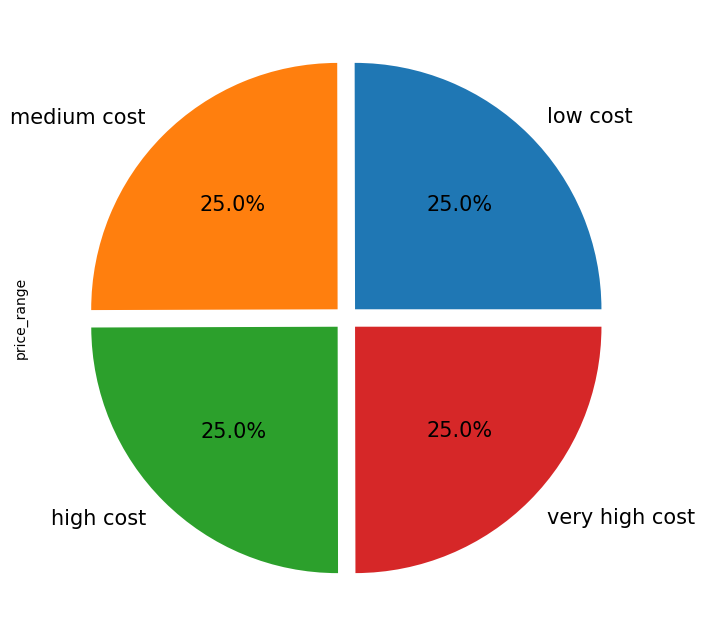

In [88]:
# Visualizing the Target variable's class distribution.
fig,ax=plt.subplots(figsize=(5,5))
labels = ["low cost", "medium cost", "high cost", "very high cost"]
price_range_values.plot.pie(explode=[0.05]*4,labels=labels,autopct='%1.1f%%',figsize=(12,8),ax=ax,fontsize=15)    # plotting pie chart


#### We can see that our target varibale is equally distributed.Thus we don't have to worry about data imbalance and there is no need of oversampling or undersampling.Which is good for us.

#### Chart - 2

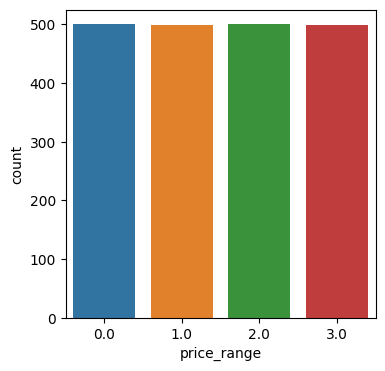

In [89]:
# Chart - 2 visualization code
fig,ax=plt.subplots(figsize=(4,4))
sns.countplot(x=df['price_range'],ax=ax)
plt.show()

####  conclusion : From the above count plot chart total 2000 dataset.I got to know that, there are 500 mobile data which are low cost, 500 mobile data which are medium cost, 500 mobile data which are high cost and 500 mobile data which are very high cost of the whole mobile data given in the dataset.

#### Chart - 3

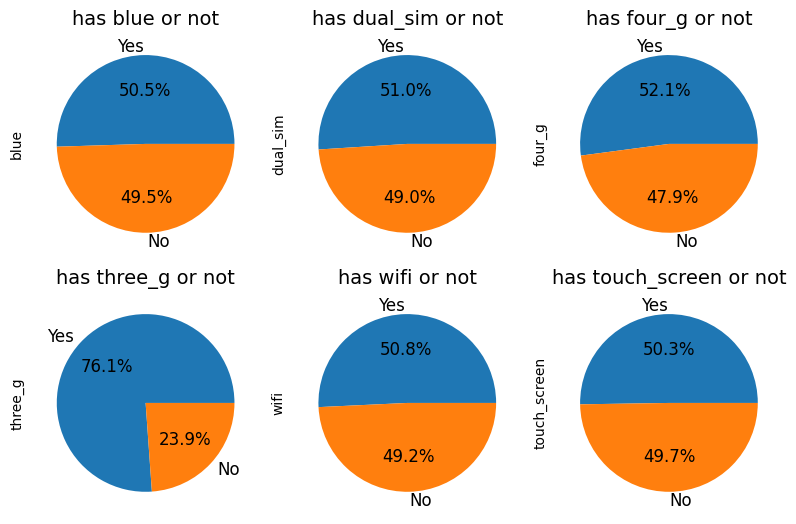

In [90]:
# Chart - 3 visualization code
plt.figure(figsize=(8,8))
rows=3
col=3
count=1
var_list=['blue','dual_sim','four_g','three_g','wifi','touch_screen']
labels=['Yes','No']
for var in var_list:
  plt.subplot(rows,col,count)
  df[var].value_counts().plot.pie(autopct='%1.1f%%',fontsize=12,labels=labels)
  plt.title(f'has {var} or not',fontsize=14)
  plt.tight_layout()
  count=count+1

#### 1 means it has the specifications
#### 0 means it do not have the specifications
#### Percentage Distribution of Mobiles having bluetooth,dual sim, 4G,wifi and touchscreen are almost 50 %
#### very few mobiles(23.8%) do not have Three_g


# **Categorical data and numerical data**

In [98]:
# Write your code to make your dataset analysis ready.
# numeric col list
numeric_col=['battery_power','clock_speed','fc','int_memory','m_dep','mobile_wt','n_cores','pc','px_height',
             'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time',]

data_cat = df[['blue','dual_sim', 'four_g','three_g','touch_screen', 'wifi']]

#### Chart - 5

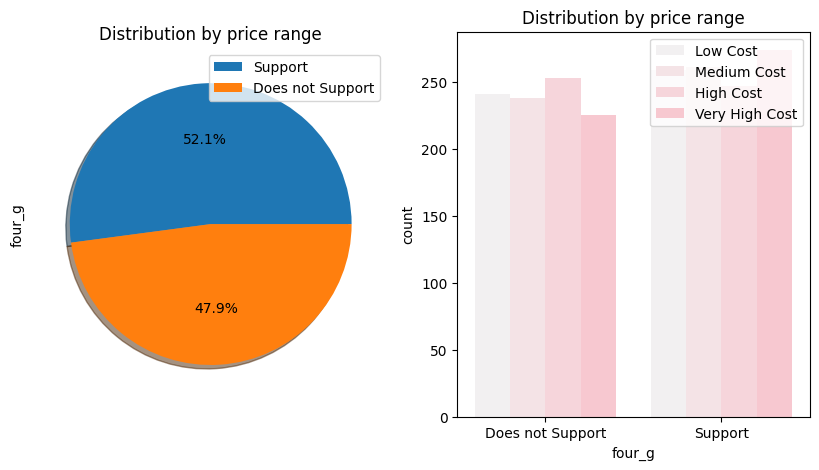

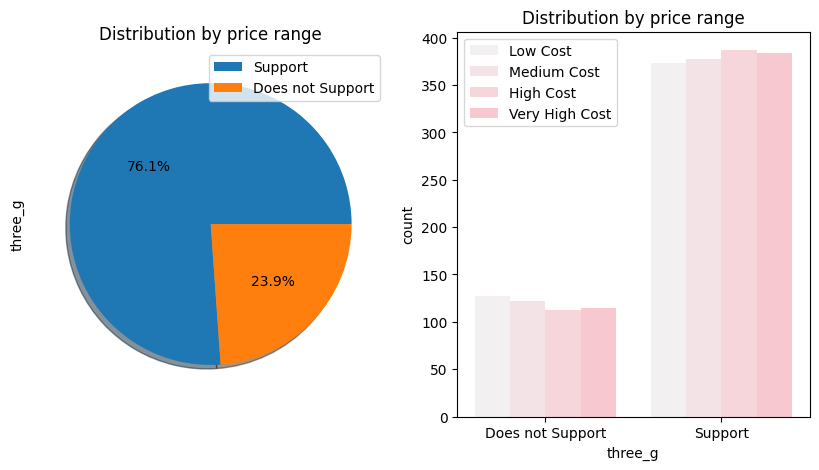

In [93]:
binary_features = [ 'four_g', 'three_g']

# Chart - 6 visualization code
# Plot of binary features against price range

for col in binary_features:
  fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (10, 5))

  df[col].value_counts().plot.pie (autopct='%1.1f%%', ax = ax1, shadow=True, labeldistance=None)
  ax1.set_title('Distribution by price range')
  ax1.legend(['Support', 'Does not Support'])
  sns.countplot(x = col, hue = 'price_range', data = df, ax = ax2, color = 'pink')
  ax2.set_title('Distribution by price range')
  ax2.set_xlabel(col)
  ax2.legend(['Low Cost', 'Medium Cost', 'High Cost', 'Very High Cost'])
  ax2.set_xticklabels(['Does not Support', 'Support'])

#### conclusion : 3g has supported by 24 % more as compare to 4g mobiles

#### Chart - 6

<AxesSubplot: xlabel='price_range', ylabel='battery_power'>

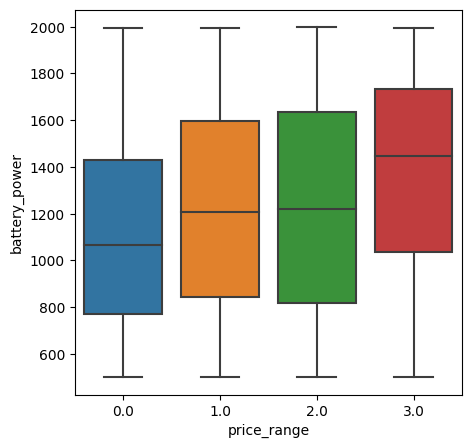

In [94]:
# Chart - 6 visualization code
fig,ax=plt.subplots(figsize=(5,5))
sns.boxplot(x="price_range", y="battery_power", data=df)

#### Chart - 7

In [100]:
# numeric col list
numeric_col=['battery_power','clock_speed','fc','int_memory','m_dep','mobile_wt','n_cores','pc','px_height',
             'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time',]

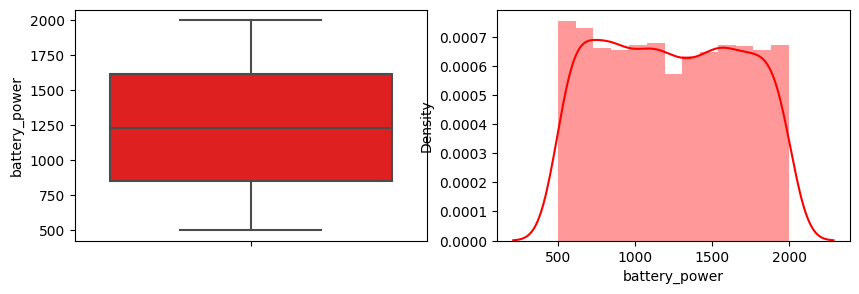

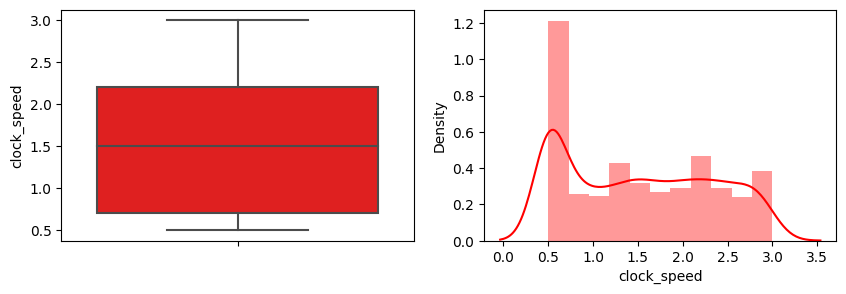

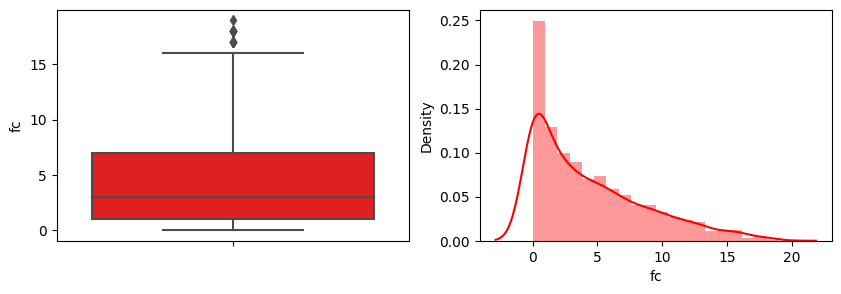

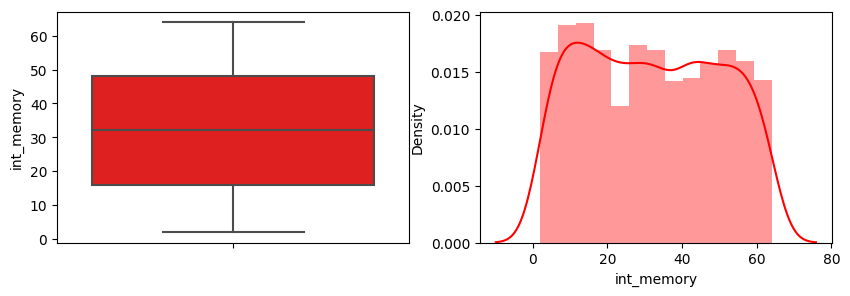

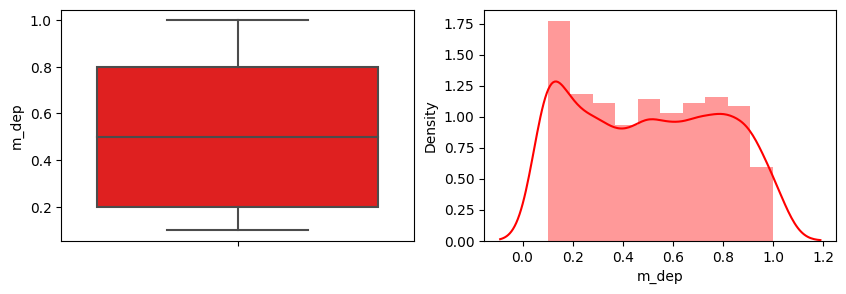

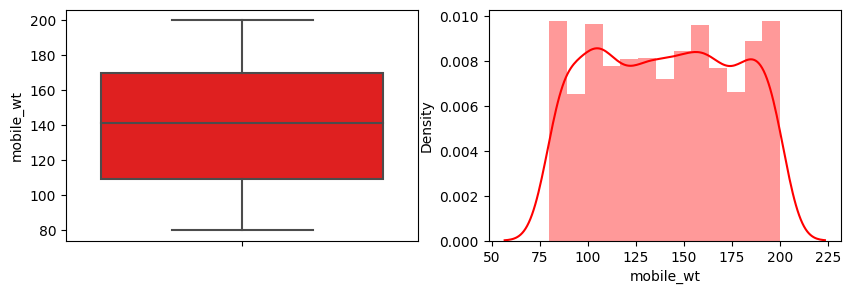

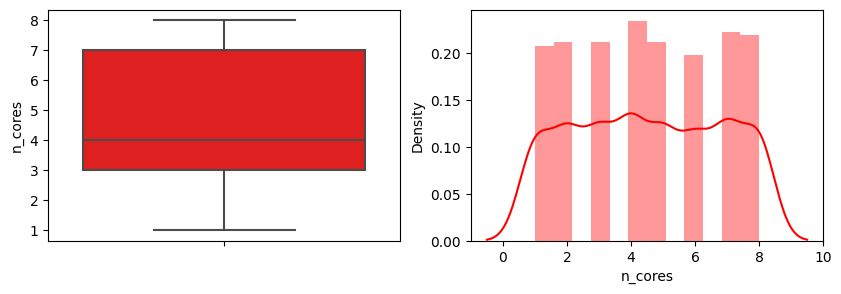

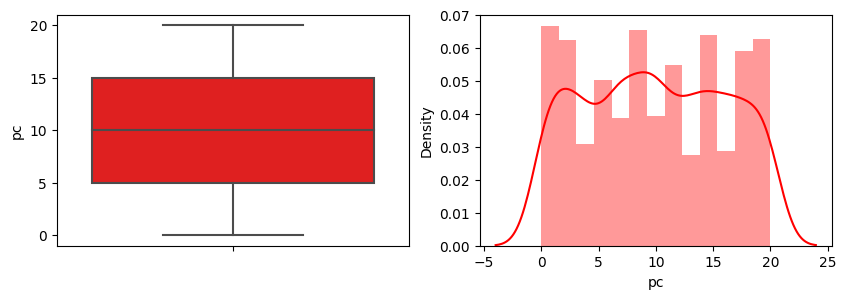

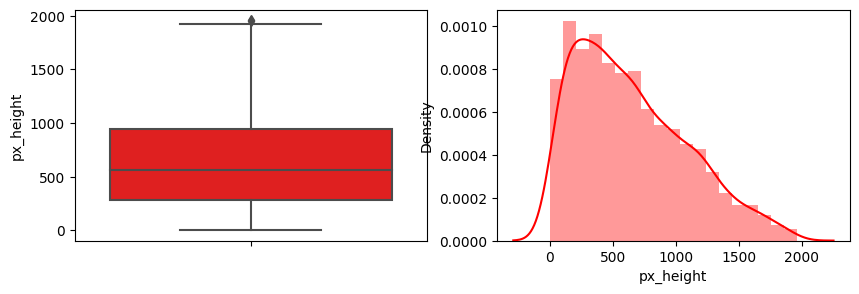

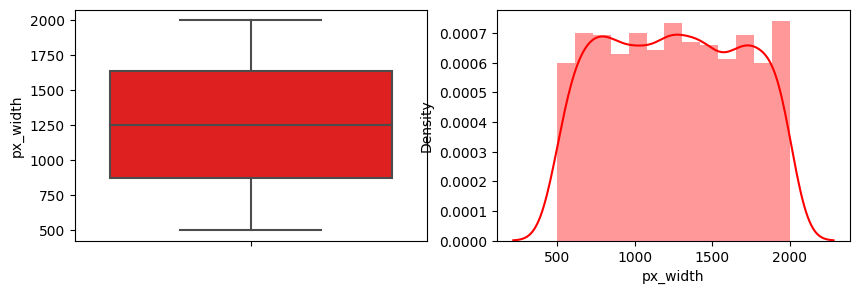

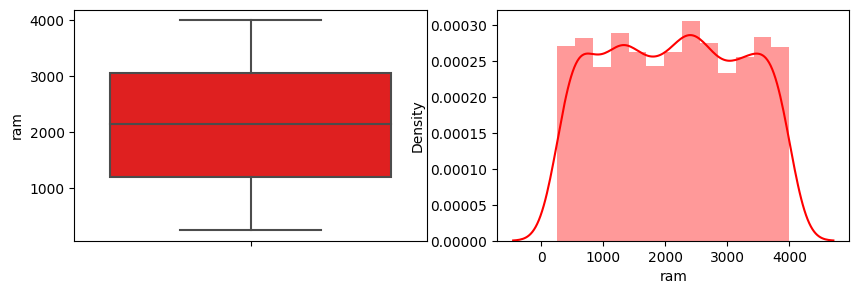

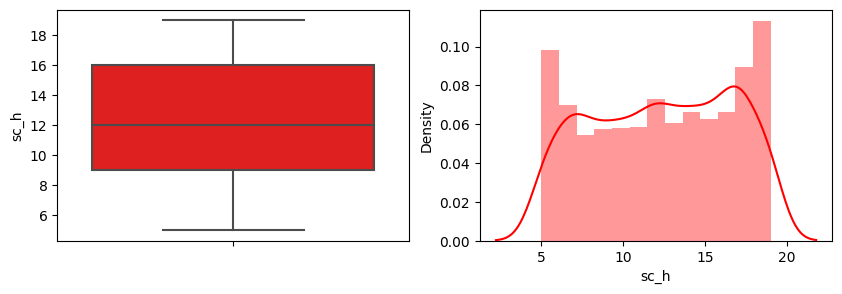

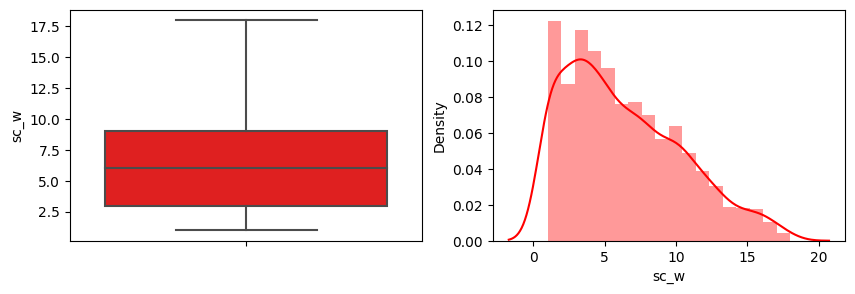

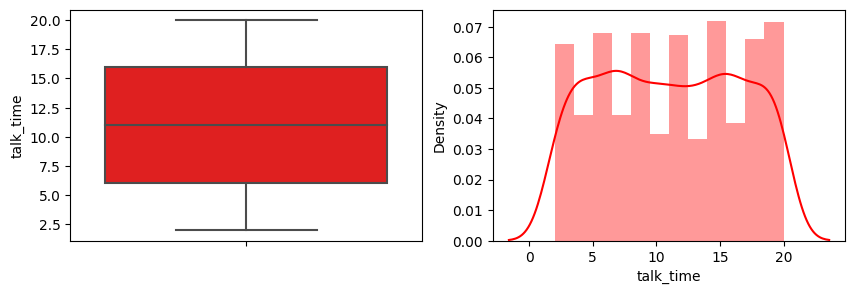

In [104]:
# plotting boXplot and distribution
for var in numeric_col:
    plt.figure(figsize=(10,3))
    plt.subplot(1, 2, 1)
    fig = sns.boxplot(y=df[var],color='red')
    fig.set_title('')
    fig.set_ylabel(var)
    
    plt.subplot(1, 2, 2)
    fig = sns.distplot(df[var],color='red')
    
    fig.set_xlabel(var)

    plt.show()

* Data is well distrubted.
* fc and px_height has some outliers.

#  Remove Outlier .

In [105]:
Q1 = df["fc"].quantile(0.25)
Q3 = df['fc'].quantile(0.991)
IQR = Q3-Q1

# Outliers are present after Quartile 3. so we will take datapoints before Q3.
df = df[(df['fc'] <= Q3)]

In [106]:

Q1 = df["px_height"].quantile(0.25)
Q3 = df['px_height'].quantile(0.991)
IQR = Q3-Q1
# Outliers are present after Quartile 3. so we will take datapoints before Q3.
df = df[(df['px_height'] <= Q3)]

### Checking again outlier

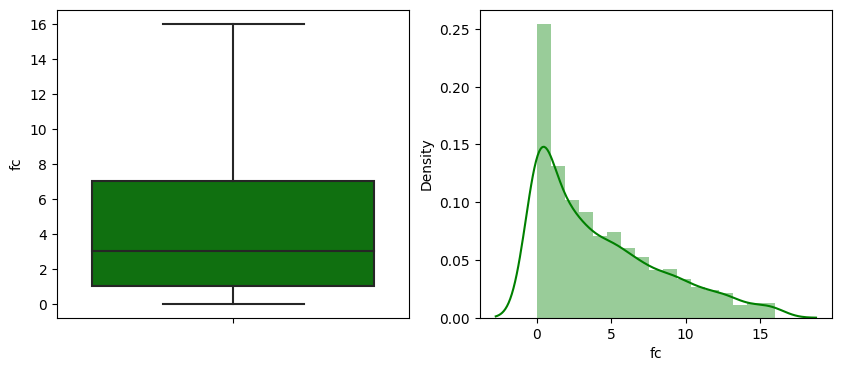

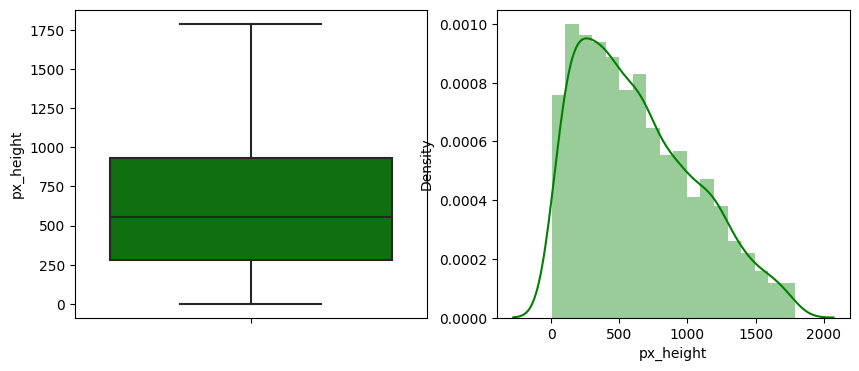

In [108]:
# Visualising whether oultliers are removed or not.
for var in ['fc','px_height']:
    plt.figure(figsize=(10,4))
    plt.subplot(1, 2, 1)
    fig = sns.boxplot(y=df[var],color='green')
    fig.set_title('')
    fig.set_ylabel(var)
    
    plt.subplot(1, 2, 2)
    fig = sns.distplot(df[var],color='green')
    
    fig.set_xlabel(var)

    plt.show()

#### there is no outlier in data

In [109]:
# create copy of mobile_data
df1=df.copy()

## **Check Correlation**

In [33]:
df.corr()

,Rented_Bike_Count,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall
Rented_Bike_Count,1.000000,0.538558,-0.199780,0.121108,0.199280,0.379788,0.261837,-0.123074,-0.141804
Temperature,0.538558,1.000000,0.159371,-0.036252,0.034794,0.912798,0.353505,0.050282,-0.218405
Humidity,-0.199780,0.159371,1.000000,-0.336683,-0.543090,0.536894,-0.461919,0.236397,0.108183
Wind_speed,0.121108,-0.036252,-0.336683,1.000000,0.171507,-0.176486,0.332274,-0.019674,-0.003554
Visibility,0.199280,0.034794,-0.543090,0.171507,1.000000,-0.176630,0.149738,-0.167629,-0.121695
Dew_point_temperature,0.379788,0.912798,0.536894,-0.176486,-0.176630,1.000000,0.094381,0.125597,-0.150887
Solar_Radiation,0.261837,0.353505,-0.461919,0.332274,0.149738,0.094381,1.000000,-0.074290,-0.072301
Rainfall,-0.123074,0.050282,0.236397,-0.019674,-0.167629,0.125597,-0.074290,1.000000,0.008500
Snowfall,-0.141804,-0.218405,0.108183,-0.003554,-0.121695,-0.150887,-0.072301,0.008500,1.000000


#### Chart - 10 - Correlation Heatmap

<AxesSubplot: >

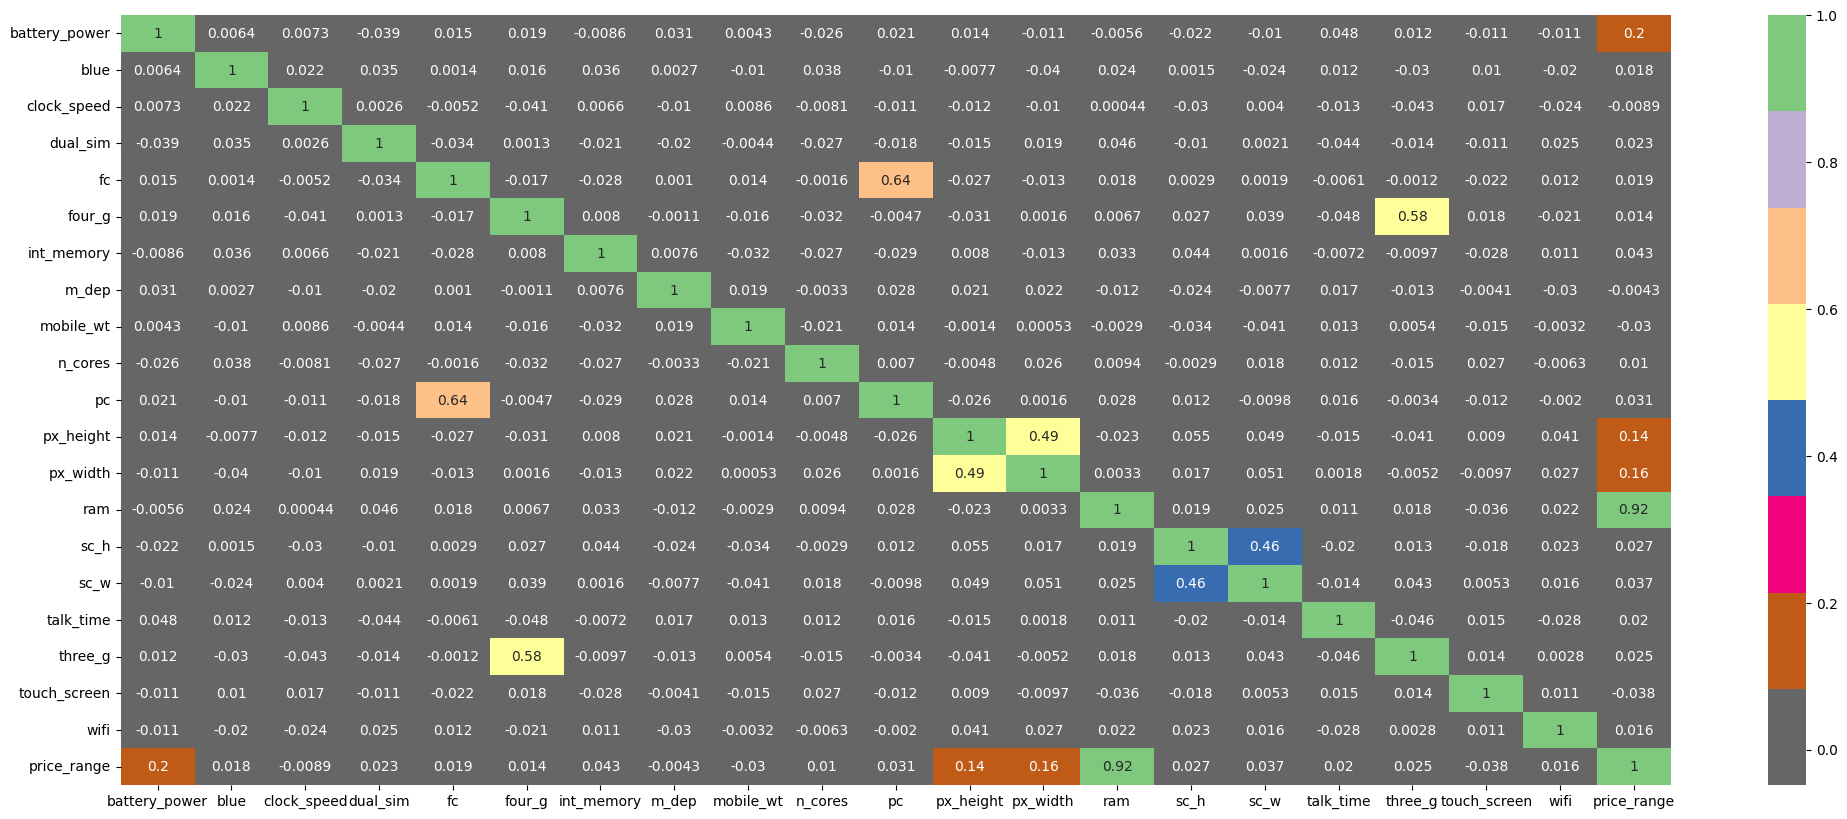

In [110]:
corr= df.corr()
plt.figure(figsize=(25,10))
sns.heatmap(corr,annot=True, cmap=plt.cm.Accent_r)

# **Model Training**

### **1. Train Test split for regression**

Before fitting any model, it is best to divide the dataset into two parts: training and testing. This means that 80% goes toward training the model, some portion will be used to check that our model is performing on any unseen data, and 20% is set aside for testing. In this step, we will split our data into training and testing sets using the Scikit-Learn library.

In [112]:
# independent variables.
X=df[['ram','px_height','battery_power','px_width','mobile_wt','int_memory','sc_h','talk_time','sc_w','fc','n_cores','pc']]

# dependent varaible
y=df['price_range']


In [113]:
X.head()   # here we check that our data is split proper or not

,ram,px_height,battery_power,px_width,mobile_wt,int_memory,sc_h,talk_time,sc_w,fc,n_cores,pc
0,2549.0,20.0,842.0,756.0,188.0,7.0,9.0,19.0,7.0,1.0,2.0,2.0
1,2631.0,905.0,1021.0,1988.0,136.0,53.0,17.0,7.0,3.0,0.0,3.0,6.0
2,2603.0,1263.0,563.0,1716.0,145.0,41.0,11.0,9.0,2.0,2.0,5.0,6.0
3,2769.0,1216.0,615.0,1786.0,131.0,10.0,16.0,11.0,8.0,0.0,6.0,9.0
4,1411.0,1208.0,1821.0,1212.0,141.0,44.0,8.0,15.0,2.0,13.0,2.0,14.0


In [114]:
y.head()

0    1.0
1    2.0
2    2.0
3    2.0
4    1.0
Name: price_range, dtype: float64

#### train and test data split

In [115]:
# splitting the data into Train and test data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1471, 12)
(491, 12)
(1471,)
(491,)




# Predictive Modeling:
Algorithms used for predictive modeling:
* 1) Decision Tree
* 2) Random Forest classifier
* 3) K-nearest Neighbour classifier
* 4) Support Vector Machine(SVM)


**As Decision tree,random forest and enssembles trees do not require Feature scaling as these are Tree based models. So we will be using X_train and X_test which are not scaled.**

In [118]:
from sklearn.preprocessing import StandardScaler
# Scaling the data.
# creating an object of MinMax Scaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)   # fitting the X_train
X_test_scaled=scaler.transform(X_test)         # transforming X_test

In [119]:
# creating a class list
Class_cat = ['low cost','medium cost', 'high cost', 'very high cost']

# **1)Decision Tree Classifier:**

In [121]:
from sklearn.tree import DecisionTreeClassifier
# Creating object of the decision tree.
dtc=DecisionTreeClassifier(random_state=0)


In [122]:
# fitting/training the train set.
dtc.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

In [123]:
# Predicting y values of train and test data.
y_train_pred=dtc.predict(X_train)
y_pred=dtc.predict(X_test)

In [124]:
# Checking train set accuracy.
accuracy_score(y_train,y_train_pred)

1.0

In [125]:
# Checking test set accuracy
accuracy_score(y_test,y_pred)

0.8391038696537678

* ***Train set accuracy is 100% and test accuracy is 84%.***
* ***Model is overfitted on train set and did not generalised well.***
* ***We will tune hyperparamters to reduce overfitting and try to imporve the model performance.***

### **Let's tune some hypereparameters of Decsion Tree classifier:**

In [139]:
# creating an object of classifier.
dtc_= DecisionTreeClassifier(random_state=0)

In [140]:
# paramter grid values for hyperparameter tunning.
grid_values={'criterion':['gini','entropy'],
             'max_depth':[2,3,4,5,6,9,10,11,12,13,14,15],
             'splitter':['best','random'],
             'min_samples_split':[3,5,10],
             'max_features':['auto','sqrt','log2',None]}

In [141]:
# applying GridSearchCv and fitting the model with it.
dtc_tune=GridSearchCV(dtc_,param_grid=grid_values,cv=5,scoring='accuracy',verbose=3)
dtc_tune.fit(X_train,y_train)   # model fitting.

Fitting 5 folds for each of 576 candidates, totalling 2880 fits
[CV 1/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_split=3, splitter=best;, score=0.292 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_split=3, splitter=best;, score=0.289 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_split=3, splitter=best;, score=0.323 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_split=3, splitter=best;, score=0.279 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_split=3, splitter=best;, score=0.303 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_split=3, splitter=random;, score=0.298 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_split=3, splitter=random;, score=0.248 total time=   0.0s
[CV 3/5] END criterion=gini, 

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6, 9, 10, 11, 12, 13, 14,
                                       15],
                         'max_features': ['auto', 'sqrt', 'log2', None],
                         'min_samples_split': [3, 5, 10],
                         'splitter': ['best', 'random']},
             scoring='accuracy', verbose=3)

In [142]:
# getting best parameters for model.
dtc_tune.best_params_

{'criterion': 'entropy',
 'max_depth': 6,
 'max_features': None,
 'min_samples_split': 3,
 'splitter': 'best'}

In [143]:
# getting best estimators
dtc_tune.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_split=3,
                       random_state=0)

In [144]:
# using best parameters and training the the data.
dtc_optimal=DecisionTreeClassifier(criterion='entropy', max_depth=9, min_samples_split=10,
                       random_state=0)
dtc_optimal.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=9, min_samples_split=10,
                       random_state=0)

In [145]:
# predicting y values of train and test set.
y_train_pred=dtc_optimal.predict(X_train)
y_pred=dtc_optimal.predict(X_test)

In [146]:
# Checking the accuarcy score of train set.
accuracy_score(y_train,y_train_pred)

0.9762066621346023

In [147]:
# Checking the accuarcy score of test set.
accuracy_score(y_test,y_pred)

0.8513238289205702

### **Decision Tree Classifier-Observations:**
* ***Train accuarcy has been reduced to 98% from 100% and test accuarcy is increased by 1% . Thus we somewhat reduced the overfiiting by reducing the training accuarcy. However this will not be good model for us.***

* ***RAM,battery power,px_height and width came out to be the most important featrures***
* ***This model classified the class 0 and class 3 very nicely as we can see the AUC is almost 0.96 for both classes,whereas for class 1 and class 2 it is 0.88.***

# **2) Random Forest classifier:**

### **With default hyperparamters:**

In [156]:
# splitting the data into trainset and test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [159]:
from sklearn.ensemble import  RandomForestClassifier
# creating an object of the classifier.
rfc=RandomForestClassifier(random_state=0)

In [160]:
# fitting/training the model.
rfc.fit(X_train,y_train)

RandomForestClassifier(random_state=0)

In [161]:
# predicting the y values of train set and test set.
y_train_pred=rfc.predict(X_train)
y_pred=rfc.predict(X_test)

In [162]:
# Checking the accuarcy score of train set.
accuracy_score(y_train,y_train_pred)

1.0

In [163]:
# Checking the accuracy score of test set.
accuracy_score(y_test,y_pred)

0.8859470468431772

* ***Train accuarcy is 100% and test accuracy is 88%. which is quite good. But model seems to be overfitted and has not generalised the data well. We need to reduce overfitting and improve the model performance.***
* ***we do some hyperparameter tunning to reduce overfitting***

### **Let's do some Hyperparamter Tunning of the Random forest model**

In [173]:
# para_grid values to pass in gridsearchcv.
grid_values={'n_estimators':[300, 400, 500, 700],
          'max_depth':[None, 10, 20, 40],
          'min_samples_split':[2,6,10],
          'max_leaf_nodes':[None],
          'criterion':['entropy','gini'],
          'max_features':['auto','log2','sqrt']
          
             }

In [174]:
# creating the instance 
rfc_= RandomForestClassifier(random_state=0)

In [181]:
# Applying GridSearchCV
rfc_tune=GridSearchCV(rfc_,param_grid=grid_values,cv=2,verbose=3,scoring='accuracy')
rfc_tune.fit(X_train,y_train)

Fitting 2 folds for each of 288 candidates, totalling 576 fits
[CV 1/2] END criterion=entropy, max_depth=None, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=300;, score=0.875 total time=   2.2s
[CV 2/2] END criterion=entropy, max_depth=None, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=300;, score=0.878 total time=   2.0s
[CV 1/2] END criterion=entropy, max_depth=None, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=400;, score=0.876 total time=   3.0s
[CV 2/2] END criterion=entropy, max_depth=None, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=400;, score=0.879 total time=   2.9s
[CV 1/2] END criterion=entropy, max_depth=None, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=500;, score=0.880 total time=   3.1s
[CV 2/2] END criterion=entropy, max_depth=None, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=500;, score=0.882 to

GridSearchCV(cv=2, estimator=RandomForestClassifier(random_state=0),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [None, 10, 20, 40],
                         'max_features': ['auto', 'log2', 'sqrt'],
                         'max_leaf_nodes': [None],
                         'min_samples_split': [2, 6, 10],
                         'n_estimators': [300, 400, 500, 700]},
             scoring='accuracy', verbose=3)

In [182]:
#Getting best paramters for the models
rfc_tune.best_params_

{'criterion': 'entropy',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_samples_split': 6,
 'n_estimators': 500}

In [183]:
# fitting/training the data with best parameters.
rfc_optimal=RandomForestClassifier(max_features='auto',criterion='entropy',max_depth=None,max_leaf_nodes=None,min_samples_split=6,n_estimators=700,random_state=0)
rfc_optimal.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_features='auto',
                       min_samples_split=6, n_estimators=700, random_state=0)

In [184]:
# predicting y values of train and test set.
y_train_pred=rfc_optimal.predict(X_train)
y_pred=rfc_optimal.predict(X_test)

In [185]:
# checking the train accuracy score.
accuracy_score(y_train,y_train_pred)

1.0

In [186]:
# checking the test accuracy score.
accuracy_score(y_test,y_pred)

0.8981670061099797

###**Observations of Random Forest:**
***Before Tuning***
* ***training accuarcy = 100%***
* ***test accuarcy = 88%***

***Model is overfitted the data and does not generalised well. So we tuned the hyperparameters.***
***After tuning:***
* ***Training accuarcy= 100%***
* ***Test accuarcy = 90%***

***we have slightly improved the model and overfitting is reduced slightly.***

***From roc curve its clear that model has poorly performed to classify class 1 and class 2.***

# **3)K Nearest Neighbors**

### **With default hyperparametrs:**

In [208]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()     # creating an object of the classifier
knn.fit(X_train_scaled,y_train)   #  fitting the data

KNeighborsClassifier()

In [209]:
# predicting the y values of train and test set.
y_train_pred=knn.predict(X_train_scaled)
y_pred=knn.predict(X_test_scaled)

In [217]:
# checking the accuracy score of train set
accuracy_score(y_train,y_train_pred)

0.7586675730795377

In [218]:
# Checking the accuracy score of test set.
accuracy_score(y_test,y_pred)

0.594704684317719

### **Let's do some HyperParameter tuning.**

In [215]:
# creating an object of classifier
knn=KNeighborsClassifier()

In [213]:
# parameter grid values.
grid_values = {'n_neighbors':list(range(1, 31))}

In [219]:
# applyong GridSearchCv with above grid values and cv=5
knn_tune=GridSearchCV(knn,cv=5,scoring='accuracy',verbose=3,param_grid=grid_values)
knn_tune.fit(X_train_scaled,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV 1/5] END .....................n_neighbors=1;, score=0.590 total time=   0.0s
[CV 2/5] END .....................n_neighbors=1;, score=0.602 total time=   0.0s
[CV 3/5] END .....................n_neighbors=1;, score=0.517 total time=   0.0s
[CV 4/5] END .....................n_neighbors=1;, score=0.588 total time=   0.0s
[CV 5/5] END .....................n_neighbors=1;, score=0.520 total time=   0.0s
[CV 1/5] END .....................n_neighbors=2;, score=0.546 total time=   0.0s
[CV 2/5] END .....................n_neighbors=2;, score=0.578 total time=   0.0s
[CV 3/5] END .....................n_neighbors=2;, score=0.527 total time=   0.0s
[CV 4/5] END .....................n_neighbors=2;, score=0.517 total time=   0.0s
[CV 5/5] END .....................n_neighbors=2;, score=0.510 total time=   0.0s
[CV 1/5] END .....................n_neighbors=3;, score=0.559 total time=   0.0s
[CV 2/5] END .....................n_neighbors=3

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30]},
             scoring='accuracy', verbose=3)

In [220]:
# getting thge best parameters
knn_tune.best_params_                     # thus  best n_neighnors came out to be 29

{'n_neighbors': 29}

In [221]:
# fitting the data with best parameters
knn_optimal=KNeighborsClassifier(n_neighbors=29)
knn_optimal.fit(X_train_scaled,y_train)

KNeighborsClassifier(n_neighbors=29)

In [222]:
# predicting y values of train and test set.
y_train_pred=knn_optimal.predict(X_train_scaled)
y_pred=knn_optimal.predict(X_test_scaled)

In [223]:
#checking the accuracy score of train set.
accuracy_score(y_train,y_train_pred)

0.7661454792658056

In [224]:
# checking the accuracy score of test set.
accuracy_score(y_test,y_pred)

0.7026476578411406

### **Observations:**
***Before hyperparameters tuning:***

* ***Train Accuracy:75 %***
* ***Test Accuarcy:59 %***

***Clearly Model has performed very worst. We did hyperparameter tuning***

***After Hyperparameter Tuning:***

* ***Train Accuarcy: 77%***
* ***Test Accuarcy: 70%***

***Surely we improved the model perfromance and reduced overfitting but however this is not  good model for us.***



# **4) Support Vector Machine:** 

### **with default parameters.**

In [256]:
# Import all relevant libraries

from sklearn.svm import SVC

In [257]:
svc = SVC(random_state=101)      # creating an object of classifier
svc.fit(X_train_scaled,y_train)    # fitting the model/training the model.

SVC(random_state=101)

In [258]:
# predicting the y value of train set and test set
y_train_pred=svc.predict(X_train_scaled)
y_pred=svc.predict(X_test_scaled)


In [259]:
# Accuracy score for train set
accuracy_score(y_train,y_train_pred)

0.9857239972807614

In [260]:
# Accuracy score for test set.
accuracy_score(y_test,y_pred)

0.8981670061099797

### **Hyperparameter Tuning**

In [261]:
# parameter grid for GridSearchCv
grid_values = {
    'C':[0.01,0.1,1,10],
    'kernel' : ["linear","poly","rbf","sigmoid"],
    'degree' : [1,3,5,7],
    'gamma' : [0.01,1]
}

In [262]:
# creating an object for classifier
svm  = SVC ()

In [263]:
# Hyperparameter tuning with the GrdiSearhCV with cv=5
svm_cv = GridSearchCV(svm, grid_values, cv = 5,verbose=2)
svm_cv.fit(X_train_scaled,y_train)     # fitting the data into the model

Fitting 5 folds for each of 128 candidates, totalling 640 fits
[CV] END ........C=0.01, degree=1, gamma=0.01, kernel=linear; total time=   0.1s
[CV] END ........C=0.01, degree=1, gamma=0.01, kernel=linear; total time=   0.1s
[CV] END ........C=0.01, degree=1, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END ........C=0.01, degree=1, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END ........C=0.01, degree=1, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END ..........C=0.01, degree=1, gamma=0.01, kernel=poly; total time=   0.1s
[CV] END ..........C=0.01, degree=1, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END ..........C=0.01, degree=1, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END ..........C=0.01, degree=1, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END ..........C=0.01, degree=1, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END ...........C=0.01, degree=1, gamma=0.01, kernel=rbf; total time=   0.1s
[CV] END ...........C=0.01, degree=1, gamma=0.

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1, 10], 'degree': [1, 3, 5, 7],
                         'gamma': [0.01, 1],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             verbose=2)

In [264]:
# getting the best parameters
svm_cv.best_params_

{'C': 10, 'degree': 1, 'gamma': 0.01, 'kernel': 'linear'}

In [274]:
# getting the best estimators
svm_cv.best_estimator_

SVC(C=10, degree=1, gamma=0.01, kernel='linear')

In [275]:
# applying best parameters to the SVm model.
svm_optimal=SVC(C=10, degree=1, gamma=0.01, kernel='linear',probability=True)
svm_optimal.fit(X_train_scaled,y_train)   # fitting the data

SVC(C=10, degree=1, gamma=0.01, kernel='linear', probability=True)

In [272]:
# predicting the y values of train and test set.
y_train_pred=svm_optimal.predict(X_train_scaled)    
y_pred=svm_optimal.predict(X_test_scaled)

In [277]:
# checkig the accuracy score of train set.
accuracy_score(y_train,y_train_pred)

0.9830047586675731

In [278]:
# checking the accuracy of test data
accuracy_score(y_test,y_pred)

0.9796334012219959

### **Observations**


* ***Accuracy score on train set is 98.5% and Test score is 89%.***
***Model seems to be overfitted as the differance between train and test accuracy score is almot 10%.***
* ***After Hyperparameter tuning train accuracy remained almost same  98.3% and test accuracy score increased to 97%.*** 
*  ***SVM performed very well as compared to other alogorithms.***
* ***In terms of feature importance RAM,Battery power,px_height and px_weight are the imporatant features.***
* ***f1 score for individual classes is also very good. Area under curve for each class prediction is also almost 1.***

# **Conclusion**

* ***We Started with Data understanding, data wrangling, basic EDA where we found the relationships, trends between price range and other independent variables.***
* ***Implemented various classification algorithms, out of which the SVM(Support vector machine) algorithm gave the best performance after hyper-parameter tuning with 98.3% train accuracy and 97 % test accuracy.***
* ***KNN gave very worst model performance.***
* ***We checked for the feature importance's of each model. RAM, Battery Power, Px_height and px_width contributed the most while predicting the price range.***

### ***Hurrah! We have successfully completed our Classification Capstone Project !!!***